<a href="https://colab.research.google.com/github/okoweddk/Automated-Brain-Tumor-Detection-Using-Convolutional-Neural-Networks-with-EfficientNet-Architecture/blob/main/PROJECT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHIKAMADU SOPHIA OKORO

OKO22608981

Data Link: https://www.kaggle.com/datasets/lakshancooray23/tumour-classification-images

In [32]:
!pip install scikit-image==0.19.3 # Replace 0.19.3 with the desired version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.13 requires scikit-image>=0.21.0, but you have scikit-image 0.19.3 which is incompatible.


Libraries and Functions

os:Provides a way of using operating system-dependent functionality such as reading or writing to the file system.

cv2 (OpenCV):A powerful library for computer vision tasks. It's used for image processing and manipulation.

Common functions include reading, writing, displaying images, and performing image transformations.

numpy (np):A fundamental package for scientific computing in Python.
Provides support for arrays, matrices, and many mathematical functions.

pandas (pd):A library for data manipulation and analysis.
Provides data structures like DataFrame, which is useful for handling structured data.

skimage.feature (graycomatrix, graycoprops):Part of the scikit-image library, which is used for image processing.

graycomatrix: Computes the gray-level co-occurrence matrix (GLCM), which is a statistical method of examining texture that considers the spatial relationship of pixels.

graycoprops: Extracts texture properties such as contrast, dissimilarity, homogeneity, energy, and correlation from the GLCM.

matplotlib.pyplot (plt):A plotting library used for creating static, animated, and interactive visualizations in Python.

sklearn.model_selection (train_test_split):A module from scikit-learn used for splitting data into training and testing sets.Helps in evaluating the performance of a machine learning model by training it on one subset and testing it on another.

sklearn.svm (SVC):Support Vector Classification, a type of Support Vector Machine (SVM) for classification tasks.

SVM is a supervised machine learning algorithm used for classification or regression challenges.

sklearn.metrics (classification_report, accuracy_score):Provides functions to evaluate the performance of machine learning models.
classification_report: Generates a text report showing the main classification metrics.

accuracy_score: Calculates the accuracy of the classification model. could you do this in a more descriptive manner

In [33]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops # Correct function names
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Desciption of Dataset



The section code is a Python script to count the number of images in each subfolder within a specified directory, and then display the total count of images across all subfolders

In [34]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset, which consists of 685 images distributed among four classes, there is a noticeable class imbalance with the “No Tumor” category having the most images and “Meningioma” the fewest. This imbalance can significantly impact model performance, as the model may become biased towards the majority class (e.g., “No Tumor”), potentially leading to poorer performance on minority classes (e.g., “Meningioma”). Standard accuracy metrics might be misleading, as a model could achieve high accuracy by predominantly predicting the majority class. Therefore, it's crucial to use metrics like precision, recall, and F1-score to better assess performance across all classes. Additionally, class imbalance can affect training dynamics, making it necessary to consider techniques such as class weighting or resampling strategies to ensure the model learns effectively and generalizes well across all categories.



In [131]:
# Specify directories
data_dir =  '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/data'
image_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/data/Train'
test_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/data/Test'
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Step 2: Initialize total image count
total_image_count = 0

# Step 3: Iterate over subfolders and count images
for subdir in subfolders:
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        image_count = len([f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))])
        print(f"Number of images in {subdir}: {image_count}")
        total_image_count += image_count

# Step 4: Display the total number of images
print(f"Total number of images: {total_image_count}")

Number of images in meningioma: 153
Number of images in notumor: 203
Number of images in glioma: 159
Number of images in pituitary: 170
Total number of images: 685


The session calculates the mean and standard deviation of pixel values for all images within each subfolder of a specified directory. It then prints these statistics for each subfolder.


The mean pixel value of an image can provide an indication of the overall brightness or intensity. For example, a higher mean value suggests a brighter image, while a lower mean value indicates a darker image.


The standard deviation of pixel values indicates the contrast or variability within the image. A higher standard deviation suggests more variability in pixel intensities, which typically means more contrast.

In [37]:
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Step 2: Function to calculate mean and standard deviation for an image
def calculate_mean_std(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    return np.mean(img), np.std(img)

# Step 3: Initialize dictionary to store mean and std for each folder
folder_stats = {}

# Step 4: Iterate over subfolders and calculate mean and std for each image
for subdir in subfolders:
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        means = []
        stds = []
        for filename in os.listdir(subdir_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                image_path = os.path.join(subdir_path, filename)
                mean, std = calculate_mean_std(image_path)
                means.append(mean)
                stds.append(std)
        folder_stats[subdir] = {
            "mean": np.mean(means),
            "std": np.std(stds)
        }

# Step 5: Display the mean and standard deviation for each folder
for subdir, stats in folder_stats.items():
    print(f"Folder: {subdir}")
    print(f"  Mean of pixel values: {stats['mean']}")
    print(f"  Standard deviation of pixel values: {stats['std']}\n")

Folder: meningioma
  Mean of pixel values: 43.535001468035134
  Standard deviation of pixel values: 7.809089891715404

Folder: notumor
  Mean of pixel values: 60.11954471982759
  Standard deviation of pixel values: 13.584535594418949

Folder: glioma
  Mean of pixel values: 37.91022496253439
  Standard deviation of pixel values: 5.337624216363283

Folder: pituitary
  Mean of pixel values: 48.66313332950368
  Standard deviation of pixel values: 5.018407412615199



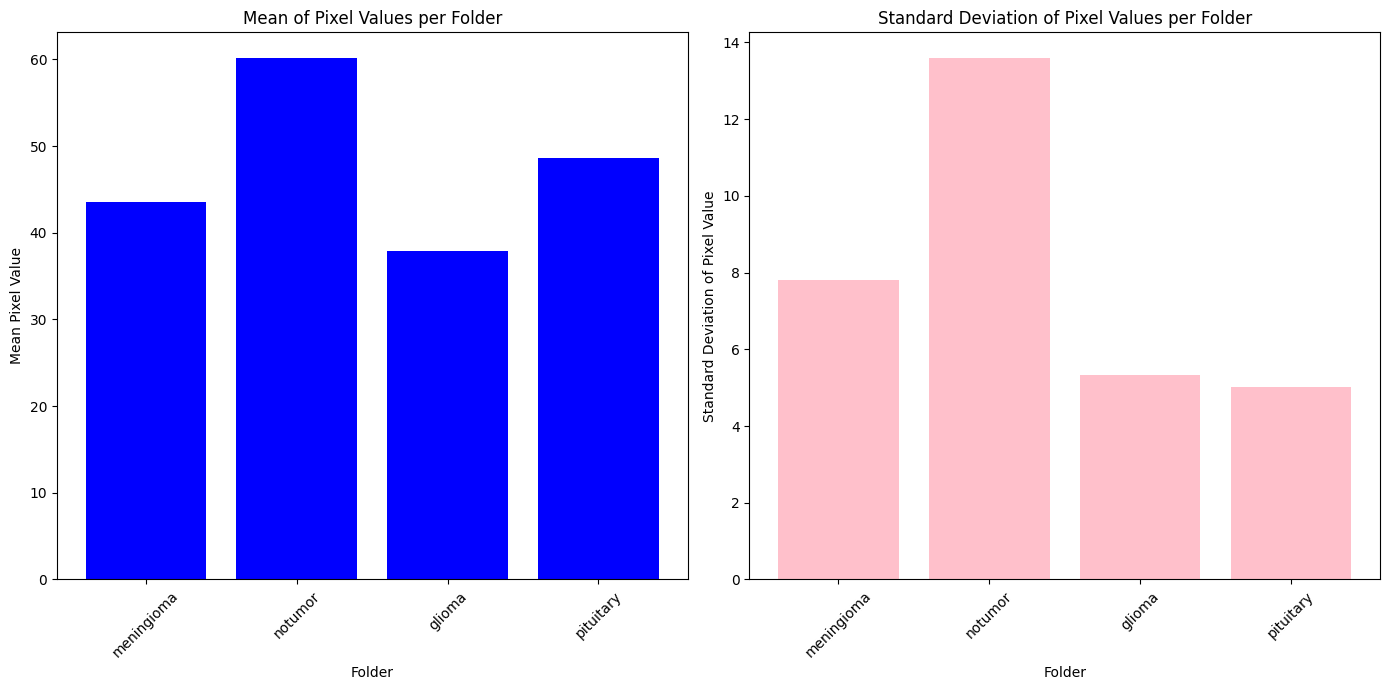

In [38]:
# Extract folder names, means, and standard deviations
folder_names = list(folder_stats.keys())
means = [folder_stats[subdir]['mean'] for subdir in folder_names]
stds = [folder_stats[subdir]['std'] for subdir in folder_names]
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot means
ax[0].bar(folder_names, means, color='blue')
ax[0].set_title('Mean of Pixel Values per Folder')
ax[0].set_xlabel('Folder')
ax[0].set_ylabel('Mean Pixel Value')
ax[0].tick_params(axis='x', rotation=45)

# Plot standard deviations
ax[1].bar(folder_names, stds, color='pink')
ax[1].set_title('Standard Deviation of Pixel Values per Folder')
ax[1].set_xlabel('Folder')
ax[1].set_ylabel('Standard Deviation of Pixel Value')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

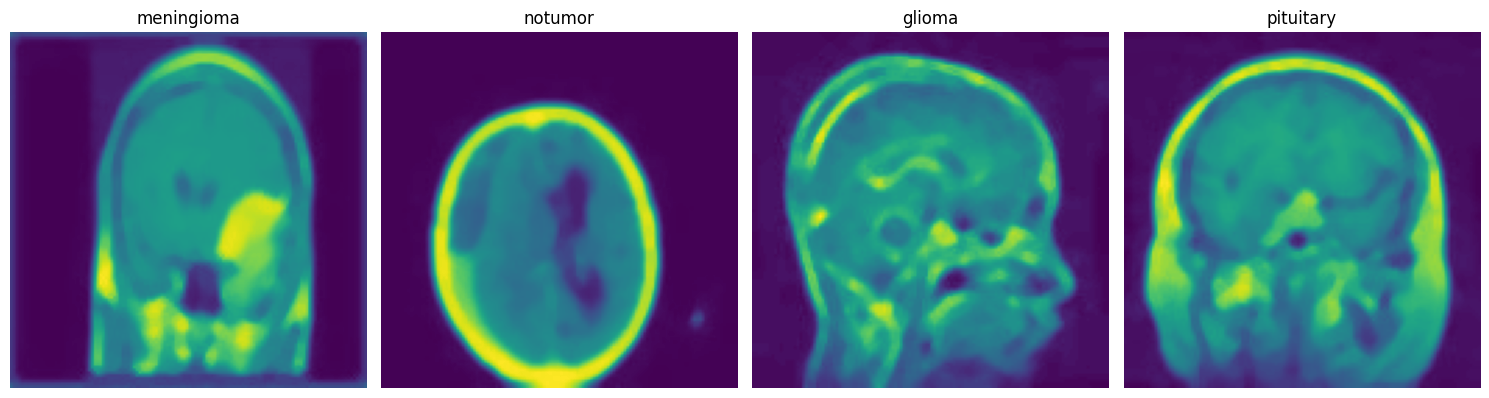

In [39]:
# importation of libraries for necessary manupulation
from PIL import Image # Import the Image class
# Get the list of subfolders
subfolders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Create a figure for plotting
fig, axes = plt.subplots(1, len(subfolders), figsize=(15, 5))
if len(subfolders) == 1:
    axes = [axes]  # Make sure axes is iterable if there's only one subfolder

# Loop through each subfolder and display one image
for ax, subdir in zip(axes, subfolders):
    subdir_path = os.path.join(image_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    if image_files:
        # Load the first image found
        image_path = os.path.join(subdir_path, image_files[0])
        img = Image.open(image_path) # Now you can use Image.open

        # Display the image
        ax.imshow(img)
        ax.set_title(subdir)
        ax.axis('off')
    else:
        ax.text(0.5, 0.5, 'No Images', horizontalalignment='center', verticalalignment='center')
        ax.set_title(subdir)
        ax.axis('off')

plt.tight_layout()
plt.show()

Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-meTr_0000.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0282.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0283.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0239.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0241.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0284.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0195.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0280.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma/Te-me_0199.jpg
Resized image saved to: /content/drive/MyDrive/MSC PR

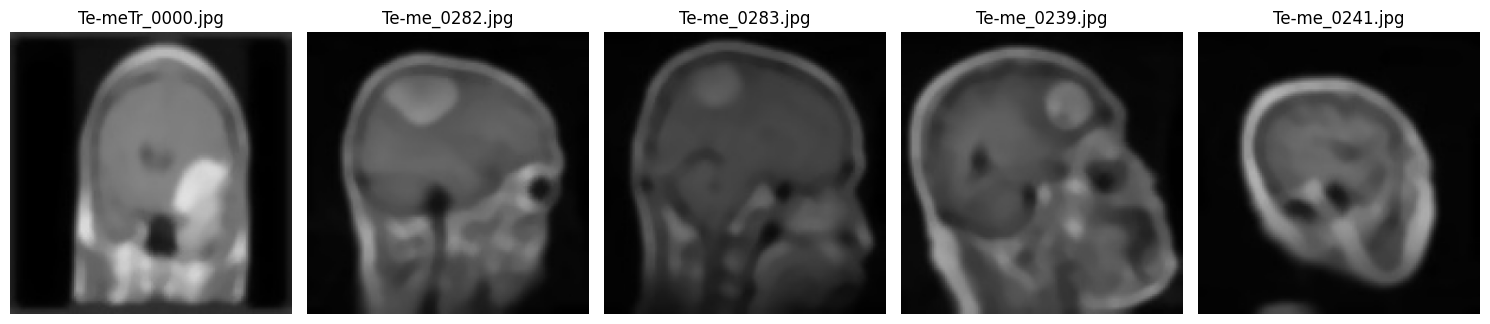

In [145]:
output_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'
# Resizing images
def resize_image(image, new_width=None, new_height=None, inter=cv2.INTER_AREA):
    (h, w) = image.shape[:2]
    if new_width is None and new_height is None:
        return image

    if new_width is None:
        r = new_height / float(h)
        dim = (int(w * r), new_height)
    else:
        r = new_width / float(w)
        dim = (new_width, int(h * r))

    resized = cv2.resize(image, dim, interpolation=inter)
    return resized

def resize_images_in_folder(image_dir, output_dir, new_width=None, new_height=None):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    resized_images = []

    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, image_dir)
                output_path = os.path.join(output_dir, relative_path)

                if not os.path.exists(output_path):
                    os.makedirs(output_path)

                image = cv2.imread(input_path)
                if image is None:
                    continue

                resized_image = resize_image(image, new_width, new_height)
                cv2.imwrite(os.path.join(output_path, file), resized_image)
                print(f"Resized image saved to: {os.path.join(output_path, file)}")

                # Collect the resized images and their paths for visualization
                resized_images.append((file, resized_image))

    return resized_images

def visualize_images(images, indices, figsize=(15, 10)):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=figsize)

    for i, idx in enumerate(indices):
        filename, image = images[idx]
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(filename)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

new_width = 300
new_height = 300

resized_images = resize_images_in_folder(image_dir, output_dir, new_width, new_height)

# Specify indices of the images you want to visualize (e.g., first 5 images)
num_images_to_display = 5
indices = list(range(min(num_images_to_display, len(resized_images))))

visualize_images(resized_images, indices)


Recalculating the mean and standard deviation after resizing ensures accurate statistics for resized images, which is crucial for consistent and effective preprocessing in image analysis and machine learning tasks. This process helps maintain uniformity across the dataset, enabling better model performance and more reliable analysis.

In [41]:
# Step 1: Get the list of subfolders
subfolders = [f for f in os.listdir(output_dir) if os.path.isdir(os.path.join(output_dir, f))]

# Step 2: Function to calculate mean and standard deviation for an image
def calculate_mean_std(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
    return np.mean(img), np.std(img)

# Step 3: Initialize dictionary to store mean and std for each folder
folder_stats = {}

# Step 4: Iterate over subfolders and calculate mean and std for each image
for subdir in subfolders:
    subdir_path = os.path.join(output_dir, subdir)
    if os.path.isdir(subdir_path):
        means = []
        stds = []
        for filename in os.listdir(subdir_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                image_path = os.path.join(subdir_path, filename)
                mean, std = calculate_mean_std(image_path)
                means.append(mean)
                stds.append(std)
        folder_stats[subdir] = {
            "mean": np.mean(means),
            "std": np.std(stds)
        }

# Step 5: Display the mean and standard deviation for each folder
for subdir, stats in folder_stats.items():
    print(f"Folder: {subdir}")
    print(f"  Mean of pixel values: {stats['mean']}")
    print(f"  Standard deviation of pixel values: {stats['std']}\n")

Folder: meningioma
  Mean of pixel values: 43.51503681917211
  Standard deviation of pixel values: 7.800787757499435

Folder: notumor
  Mean of pixel values: 60.09952380952381
  Standard deviation of pixel values: 13.574718420984043

Folder: glioma
  Mean of pixel values: 37.889454297693916
  Standard deviation of pixel values: 5.3309768699799145

Folder: pituitary
  Mean of pixel values: 48.640180065359466
  Standard deviation of pixel values: 5.01227774863061



Morphogical Operations




This script is designed to enhance image quality by applying noise reduction techniques, specifically Gaussian blur and Median filtering, to each image in a given directory. Gaussian blur smooths the image to reduce noise and detail, while the Median filter further removes noise, particularly effective against salt-and-pepper noise. To optimize performance, the script employs parallel processing through Python's multiprocessing library, enabling it to handle multiple images concurrently and significantly speed up the overall processing time. The script systematically traverses the specified directory and its subdirectories, identifying all image files with common extensions (e.g., .jpg, .png, .tif) and applying the noise reduction techniques to each. The processed images are then saved to a specified output directory, maintaining the original directory structure. This approach is especially beneficial for handling large datasets where processing efficiency is crucial.

In [42]:
# Number of images per class
meningioma = 153
notumor = 203
glioma = 159
pituitary = 170
total_images = 685

# Proportions for each class
prop_meningioma = meningioma / total_images
prop_notumor = notumor / total_images
prop_glioma = glioma / total_images
prop_pituitary = pituitary / total_images

# Print proportions
print(f"Proportion of meningioma: {prop_meningioma:.2f}")
print(f"Proportion of notumor: {prop_notumor:.2f}")
print(f"Proportion of glioma: {prop_glioma:.2f}")
print(f"Proportion of pituitary: {prop_pituitary:.2f}")

Proportion of meningioma: 0.22
Proportion of notumor: 0.30
Proportion of glioma: 0.23
Proportion of pituitary: 0.25


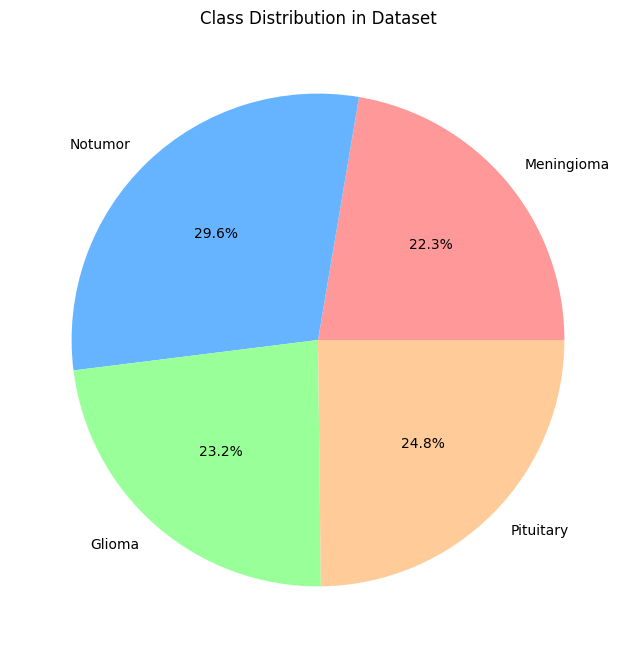

In [43]:
import matplotlib.pyplot as plt

# Data for the pie chart
class_names = ['Meningioma', 'Notumor', 'Glioma', 'Pituitary']
class_counts = [153, 203, 159, 170]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Class Distribution in Dataset')
plt.show()


In [44]:
import os
from multiprocessing import Pool

# Define noise reduction parameters
gaussian_kernel_size = (5, 5)
median_ksize = 5

# Function to apply noise reduction techniques
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        return

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, gaussian_kernel_size, 0)

    # Apply Median filter
    median_filtered_image = cv2.medianBlur(blurred_image, median_ksize)

    # Create output path
    relative_path = os.path.relpath(image_path, image_dir)
    output_path = os.path.join(output_dir, relative_path)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the filtered image
    cv2.imwrite(output_path, median_filtered_image)

# Function to process all images in a directory
def process_directory(image_dir, output_dir):
    # Get a list of all image files
    image_files = [os.path.join(root, file)
                   for root, dirs, files in os.walk(image_dir)
                   for file in files
                   if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff'))]

    # Use multiprocessing to process images in parallel
    with Pool() as pool:
        pool.map(process_image, image_files)


process_directory(image_dir, output_dir)


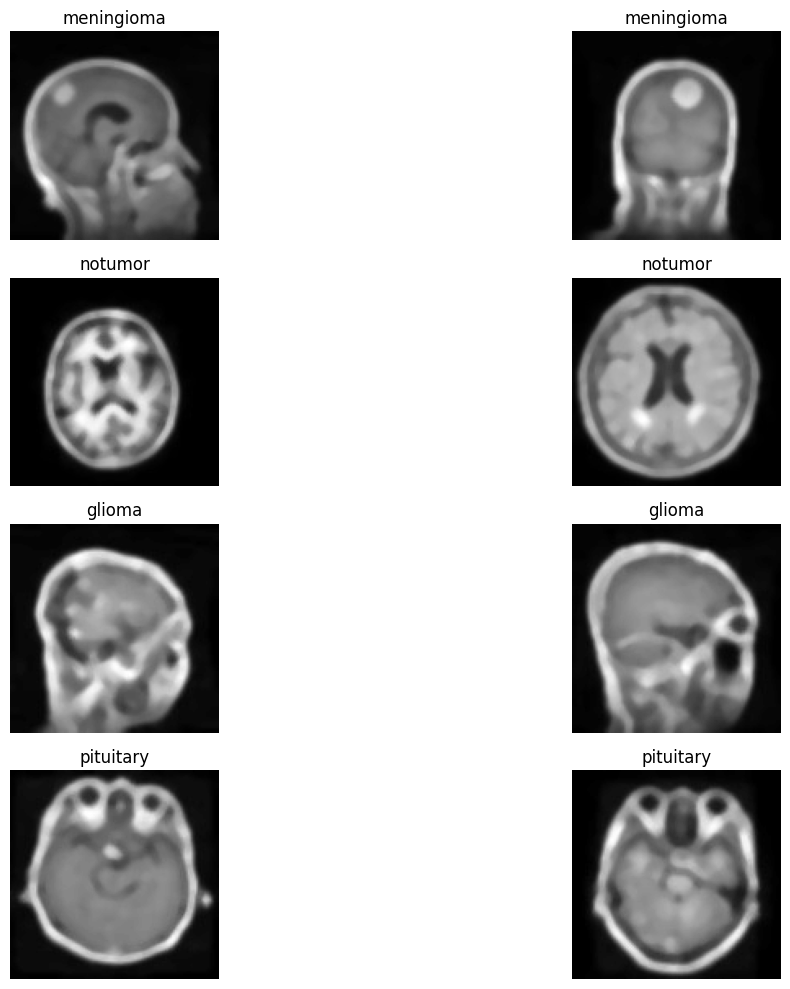

In [45]:
# Function to get image file paths grouped by folder name
def get_image_files_by_folder(directory):
    folder_images = {}

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff')):
                # Get the folder name
                folder_name = os.path.basename(root)
                if folder_name not in folder_images:
                    folder_images[folder_name] = []
                # Append the file path to the corresponding folder
                folder_images[folder_name].append(os.path.join(root, file))

    return folder_images

# Import the random module
import random

# Function to display a set of images from each folder
def display_images_by_folder(folder_images, num_images_per_folder=5):
    plt.figure(figsize=(15, 10))

    # Counter for subplot positions
    subplot_index = 1

    for folder_name, image_files in folder_images.items():
        # Randomly select a subset of images from the folder
        selected_files = random.sample(image_files, min(num_images_per_folder, len(image_files)))

        for file_path in selected_files:
            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Display the image
            plt.subplot(len(folder_images), num_images_per_folder, subplot_index)
            plt.imshow(image, cmap='gray')
            plt.title(folder_name)
            plt.axis('off')
            subplot_index += 1

    plt.tight_layout()
    plt.show()

# Get image files grouped by folder
folder_images = get_image_files_by_folder(output_dir)

# Display images from each folder
display_images_by_folder(folder_images, num_images_per_folder=2)

This script is designed for loading images from a structured folder, extracting Histogram of Oriented Gradients (HOG) features from these images, encoding the labels, splitting the data into training and testing sets, standardizing the features, and defining a parameter grid for hyperparameter tuning of a Support Vector Machine (SVM) model. Here’s a detailed breakdown of the script

In [46]:
import os
import numpy as np
from skimage.io import imread
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        subfolder = os.path.join(folder_path, label)
        if os.path.isdir(subfolder):
            for filename in os.listdir(subfolder):
                img_path = os.path.join(subfolder, filename)
                img = imread(img_path)
                features, _ = hog(img, visualize=True)  # Extract HOG features
                images.append(features)
                labels.append(label)
    return np.array(images), np.array(labels)

# Define your dataset path
dataset_path = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'

# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'kernel': ['linear','rbf', 'poly'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto']  # For RBF and Polynomial kernels
}



This script efficiently prepares image data for classification using HOG feature extraction. It loads images from a folder structure, extracts features, encodes labels, and splits the data into training and testing sets. The features are standardized, and a parameter grid is defined for SVM hyperparameter tuning. This setup is essential for training a robust image classification model with optimal hyperparameters.

In [47]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

This script segment completes the machine learning pipeline by:

Initializing and Tuning: An SVM classifier is initialized, and grid search is employed for hyperparameter tuning. This ensures that the optimal parameters for the model are found, enhancing its performance.

Training and Predicting: The model is trained using the training data, and predictions are made on the test data. This step verifies how well the model generalizes to unseen data.

Evaluating: The model's performance is evaluated using a confusion matrix and a classification report. These metrics provide detailed insights into the model's accuracy, precision, recall, and f1-score for each class, highlighting its performance in different areas.

Visualization: The confusion matrix is plotted, offering a visual representation of the model's performance. This helps in quickly identifying where the model is performing well and where it might be making errors.

This comprehensive approach ensures that the model is not only optimized for performance but also thoroughly evaluated to understand its strengths and weaknesses. By doing so, it provides a clear picture of the model's effectiveness and areas for potential improvement.

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


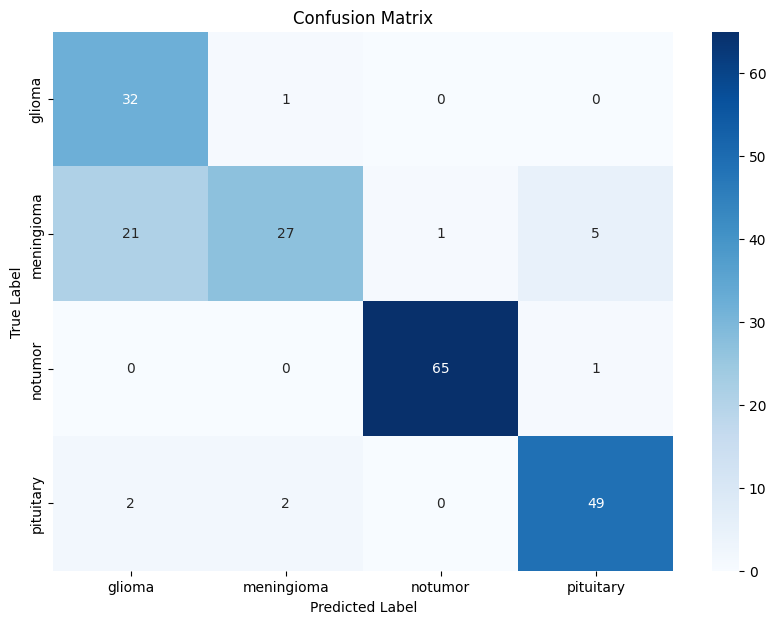

Classification Report with zero_division=0:
              precision    recall  f1-score   support

      glioma       0.58      0.97      0.73        33
  meningioma       0.90      0.50      0.64        54
     notumor       0.98      0.98      0.98        66
   pituitary       0.89      0.92      0.91        53

    accuracy                           0.84       206
   macro avg       0.84      0.84      0.82       206
weighted avg       0.87      0.84      0.83       206



In [48]:
# Initialize the SVM classifier with probability=True
svc = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions
y_pred = best_model.predict(X_test)

# Assuming 'label_encoder' is the LabelEncoder used earlier
label_names = label_encoder.classes_

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report with zero_division set to 0
print("Classification Report with zero_division=0:")
print(classification_report(y_test, y_pred, target_names=label_names, zero_division=0))

Additional Metrics:
True Positive Rate (Recall): [0.96969697 0.5        0.98484848 0.9245283 ]
True Negative Rate (Specificity): [0.86705202 0.98026316 0.99285714 0.96078431]
F1 Score: [0.72727273 0.64285714 0.98484848 0.90740741]


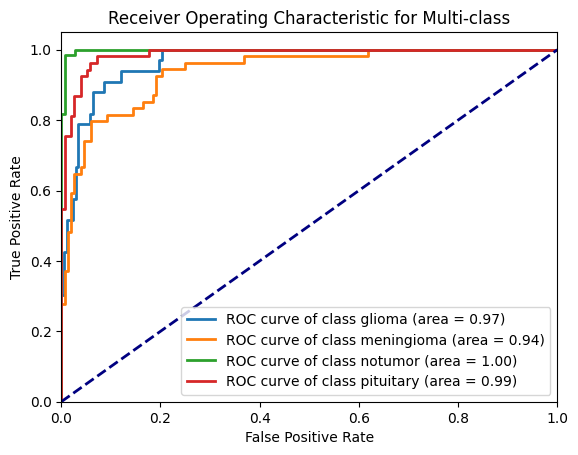

In [49]:
# Calculate and print additional metrics
from sklearn.preprocessing import LabelBinarizer # Import the LabelBinarizer class
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc here

# Calculate and print additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # Negative predictive value
    NPV = TN / (TN + FN)
    # Fall out or false positive rate
    FPR = FP / (FP + TN)
    # False negative rate
    FNR = FN / (TP + FN)
    # False discovery rate
    FDR = FP / (TP + FP)
    # F1 score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1

# Calculate the additional metrics
TPR, TNR, F1 = calculate_metrics(cm)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve for each class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

if len(label_names) == 2:  # Binary classification
    y_score = best_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    y_score = best_model.predict_proba(X_test)
    plt.figure()
    for i in range(len(label_names)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

In [97]:
import joblib

In [121]:
# Save the model to a file
joblib.dump(best_model, 'svm_model.pkl') # Changed 'svm_model' to 'model'
print("Model saved as svm_model.pkl")

Model saved as svm_model.pkl


In [52]:
 # Function to get image file paths grouped by folder name
def get_image_files_by_folder(directory):
    folder_images = {}

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff')):
                # Get the folder name
                folder_name = os.path.basename(root)
                if folder_name not in folder_images:
                    folder_images[folder_name] = []
                # Append the file path to the corresponding folder
                folder_images[folder_name].append(os.path.join(root, file))

    return folder_images

In [53]:
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        subfolder = os.path.join(folder_path, label)
        if os.path.isdir(subfolder):
            for filename in os.listdir(subfolder):
                img_path = os.path.join(subfolder, filename)
                img = imread(img_path)
                features, _ = hog(img, visualize=True)  # Extract HOG features
                images.append(features)
                labels.append(label)
    return np.array(images), np.array(labels)


# Load images and labels
X, y = load_images_from_folder(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Random Forest Classification Report:
              precision    recall  f1-score   support

      glioma       0.52      0.88      0.65        33
  meningioma       0.93      0.24      0.38        54
     notumor       0.90      0.98      0.94        66
   pituitary       0.83      1.00      0.91        53

    accuracy                           0.78       206
   macro avg       0.79      0.78      0.72       206
weighted avg       0.83      0.78      0.74       206



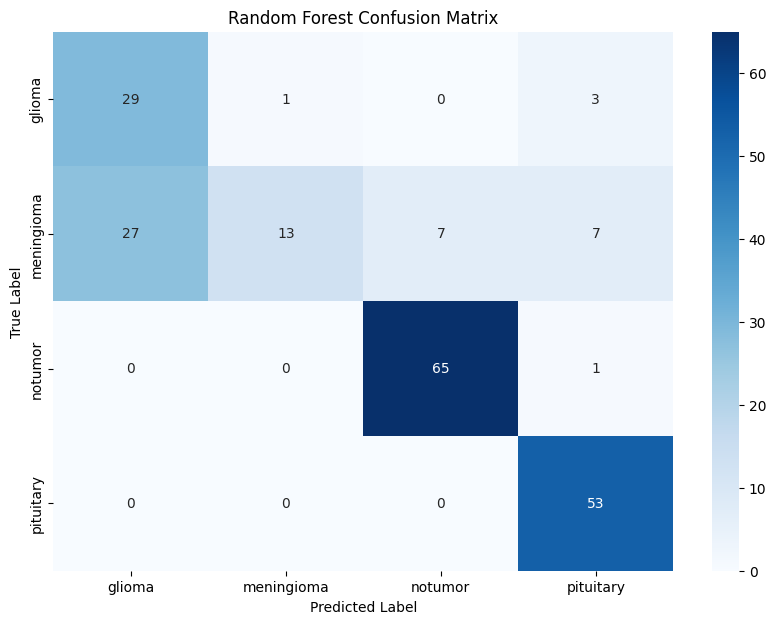

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # Import seaborn for heatmap plotting

# Get the unique class labels from the original 'y' array
label_names = label_encoder.classes_

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_names, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

Additional Metrics:
True Positive Rate (Recall): [0.96969697 0.5        0.98484848 0.9245283 ]
True Negative Rate (Specificity): [0.86705202 0.98026316 0.99285714 0.96078431]
F1 Score: [0.72727273 0.64285714 0.98484848 0.90740741]


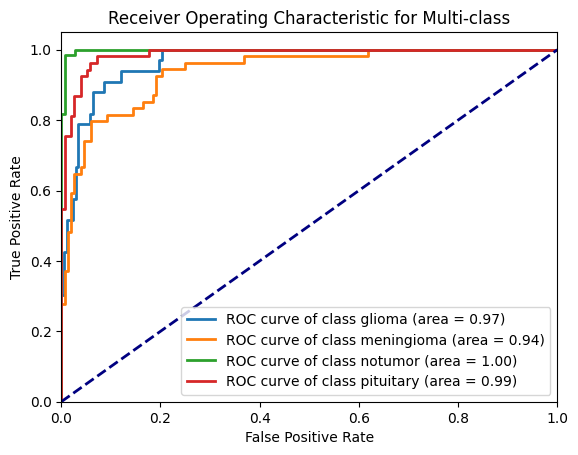

In [55]:
# Calculate and print additional metrics
from sklearn.preprocessing import LabelBinarizer # Import the LabelBinarizer class
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc here

# Calculate and print additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP / (TP + FN)
    # Specificity or true negative rate
    TNR = TN / (TN + FP)
    # Precision or positive predictive value
    PPV = TP / (TP + FP)
    # Negative predictive value
    NPV = TN / (TN + FN)
    # Fall out or false positive rate
    FPR = FP / (FP + TN)
    # False negative rate
    FNR = FN / (TP + FN)
    # False discovery rate
    FDR = FP / (TP + FP)
    # F1 score
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1

# Calculate the additional metrics
TPR, TNR, F1 = calculate_metrics(cm)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve for each class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

if len(label_names) == 2:  # Binary classification
    y_score = best_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_binarized, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    y_score = best_model.predict_proba(X_test)
    plt.figure()
    for i in range(len(label_names)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

In [127]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

KNN Classification Report:
              precision    recall  f1-score   support

      glioma       0.50      0.81      0.62        21
  meningioma       0.90      0.45      0.60        40
     notumor       0.98      1.00      0.99        45
   pituitary       0.81      0.97      0.88        31

    accuracy                           0.80       137
   macro avg       0.80      0.81      0.77       137
weighted avg       0.84      0.80      0.79       137



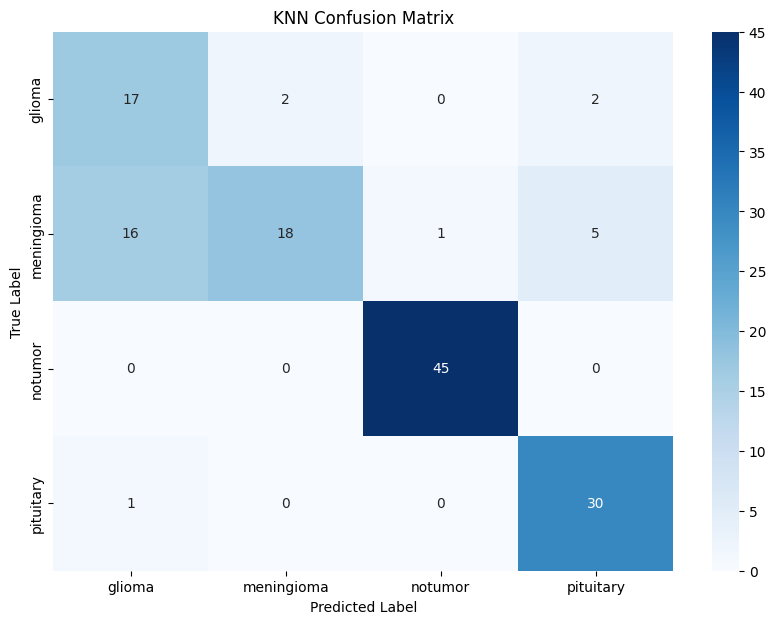

In [92]:
import os
import numpy as np
from skimage.feature import hog
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract HOG features from an image
def extract_hog_features(image_path):
    """Extract HOG features from an image."""
    image = imread(image_path, as_gray=True)
    features, _ = hog(image, visualize=True, block_norm='L2-Hys')
    return features

# Function to extract features and labels from images in a folder
def extract_features_from_folder(folder_path):
    """Extract HOG features from all images in a folder and their labels."""
    X = []
    y = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                image_path = os.path.join(root, file)
                features = extract_hog_features(image_path)
                X.append(features)
                label = os.path.basename(root)  # Assuming the folder name is the label
                y.append(label)
    return np.array(X), np.array(y)

# Load and prepare the data
image_folder = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'
X, y = extract_features_from_folder(image_folder)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)
y_prob_knn = knn_classifier.predict_proba(X_test)

# Evaluate the KNN model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_, zero_division=0))

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Confusion Matrix')
plt.show()


Additional Metrics:
True Positive Rate (Recall): [0.80952381 0.45       1.         0.96774194]
True Negative Rate (Specificity): [0.85344828 0.97938144 0.98913043 0.93396226]
F1 Score: [0.61818182 0.6        0.98901099 0.88235294]


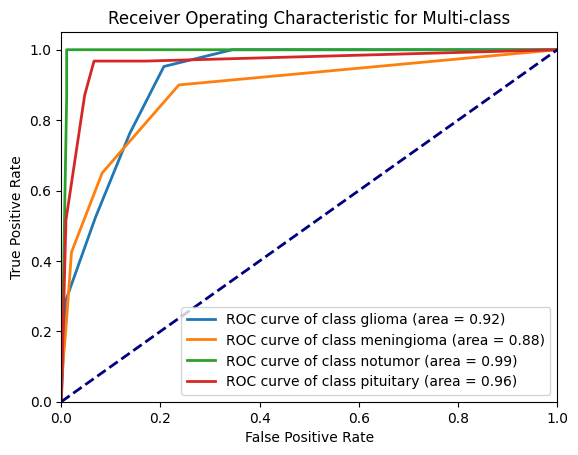

In [93]:
# Calculate additional metrics
def calculate_metrics(cm):
    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    PPV = TP / (TP + FP)
    NPV = TN / (TN + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    FDR = FP / (TP + FP)
    F1 = 2 * (PPV * TPR) / (PPV + TPR)

    return TPR, TNR, F1

# Calculate the additional metrics
TPR, TNR, F1 = calculate_metrics(cm_knn)

print("Additional Metrics:")
print(f"True Positive Rate (Recall): {TPR}")
print(f"True Negative Rate (Specificity): {TNR}")
print(f"F1 Score: {F1}")

# Plot ROC curve for each class
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

if len(label_encoder.classes_) == 2:  # Binary classification
    fpr, tpr, _ = roc_curve(y_test_binarized, y_prob_knn[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
else:  # Multi-class classification
    plt.figure()
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_knn[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-class')
    plt.legend(loc='lower right')
    plt.show()

In [94]:
import joblib

# Save the trained KNN model
model_filename = 'knn_model.pkl'
joblib.dump(knn_classifier, model_filename)

print(f"Model saved as {model_filename}")

Model saved as knn_model.pkl


Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0010.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0011.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0012.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0013.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0014.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0015.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0016.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0017.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT/meningioma/Te-me_0018.jpg
Resized image saved to: /content/drive/MyDrive/MSC PROJECTS/MSC 

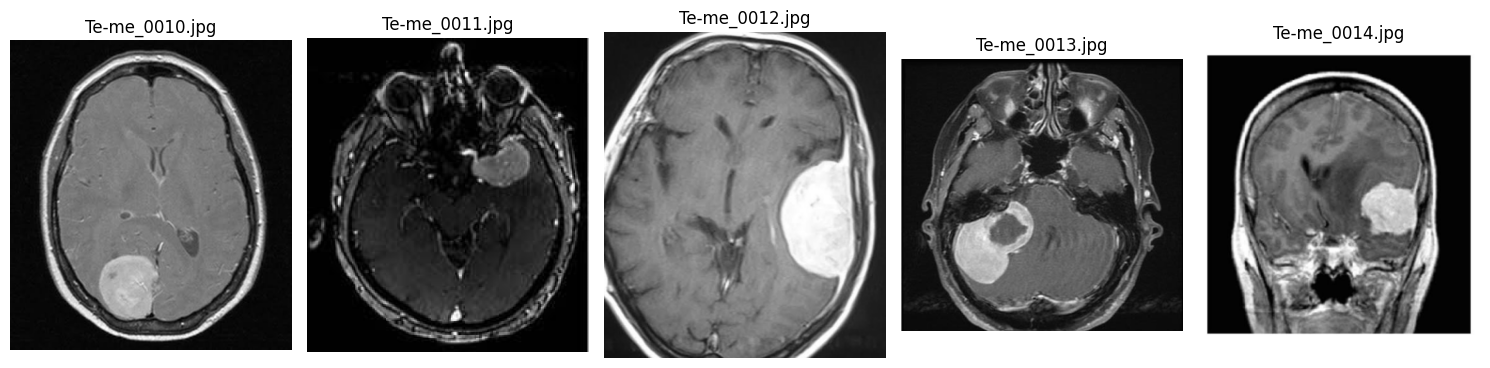

In [134]:
input_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT'
# Resizing images
def resize_image(image, new_width=None, new_height=None, inter=cv2.INTER_AREA):
    (h, w) = image.shape[:2]
    if new_width is None and new_height is None:
        return image

    if new_width is None:
        r = new_height / float(h)
        dim = (int(w * r), new_height)
    else:
        r = new_width / float(w)
        dim = (new_width, int(h * r))

    resized = cv2.resize(image, dim, interpolation=inter)
    return resized

def resize_images_in_folder(test_dir, input_dir, new_width=None, new_height=None):
    if not os.path.exists(input_dir):
        os.makedirs(input_dir)

    resized_images = []

    for root, _, files in os.walk(test_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, test_dir)
                output_path = os.path.join(output_dir, relative_path)

                if not os.path.exists(output_path):
                    os.makedirs(output_path)

                image = cv2.imread(input_path)
                if image is None:
                    continue

                resized_image = resize_image(image, new_width, new_height)
                cv2.imwrite(os.path.join(output_path, file), resized_image)
                print(f"Resized image saved to: {os.path.join(output_path, file)}")

                # Collect the resized images and their paths for visualization
                resized_images.append((file, resized_image))

    return resized_images

def visualize_images(images, indices, figsize=(15, 10)):
    num_images = len(indices)
    fig, axes = plt.subplots(1, num_images, figsize=figsize)

    for i, idx in enumerate(indices):
        filename, image = images[idx]
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(filename)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

new_width = 300
new_height = 300

resized_images = resize_images_in_folder(test_dir, input_dir, new_width, new_height)

# Specify indices of the images you want to visualize (e.g., first 5 images)
num_images_to_display = 5
indices = list(range(min(num_images_to_display, len(resized_images))))

visualize_images(resized_images, indices)


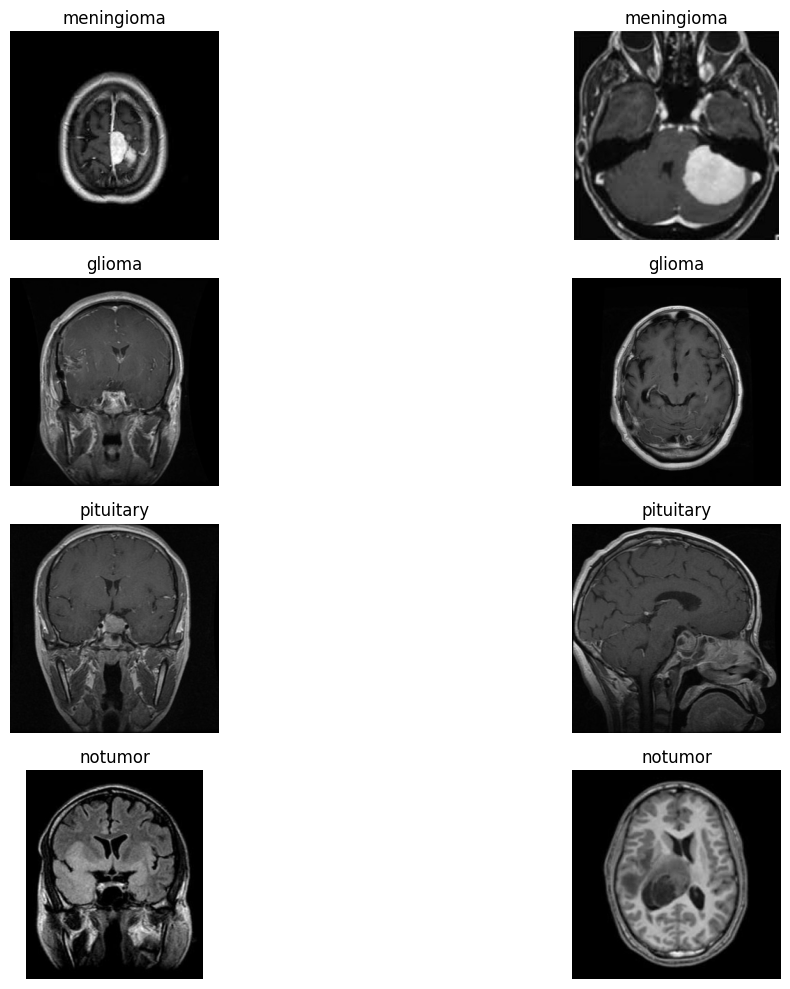

In [135]:
# Function to get image file paths grouped by folder name
def get_image_files_by_folder(directory):
    folder_images = {}

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff')):
                # Get the folder name
                folder_name = os.path.basename(root)
                if folder_name not in folder_images:
                    folder_images[folder_name] = []
                # Append the file path to the corresponding folder
                folder_images[folder_name].append(os.path.join(root, file))

    return folder_images

# Import the random module
import random

# Function to display a set of images from each folder
def display_images_by_folder(folder_images, num_images_per_folder=5):
    plt.figure(figsize=(15, 10))

    # Counter for subplot positions
    subplot_index = 1

    for folder_name, image_files in folder_images.items():
        # Randomly select a subset of images from the folder
        selected_files = random.sample(image_files, min(num_images_per_folder, len(image_files)))

        for file_path in selected_files:
            # Load the image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Display the image
            plt.subplot(len(folder_images), num_images_per_folder, subplot_index)
            plt.imshow(image, cmap='gray')
            plt.title(folder_name)
            plt.axis('off')
            subplot_index += 1

    plt.tight_layout()
    plt.show()

# Get image files grouped by folder
folder_images = get_image_files_by_folder(input_dir)

# Display images from each folder
display_images_by_folder(folder_images, num_images_per_folder=2)

In [136]:
import os
from multiprocessing import Pool

# Define noise reduction parameters
gaussian_kernel_size = (5, 5)
median_ksize = 5

# Function to apply noise reduction techniques
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        return

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, gaussian_kernel_size, 0)

    # Apply Median filter
    median_filtered_image = cv2.medianBlur(blurred_image, median_ksize)

    # Create output path
    relative_path = os.path.relpath(image_path, test_dir)
    output_path = os.path.join(input_dir, relative_path)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the filtered image
    cv2.imwrite(output_path, median_filtered_image)

# Function to process all images in a directory
def process_directory(test_dir, input_dir):
    # Get a list of all image files
    image_files = [os.path.join(root, file)
                   for root, dirs, files in os.walk(test_dir)
                   for file in files
                   if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif', '.tiff'))]

    # Use multiprocessing to process images in parallel
    with Pool() as pool:
        pool.map(process_image, image_files)


process_directory(test_dir, input_dir)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [149]:
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from skimage import io, color
from skimage.transform import resize
import os

def load_images_from_folder(folder_path):
    if not os.path.exists(folder_path):
        raise ValueError(f"Folder does not exist: {folder_path}")

    images = []
    labels = []

    # List subdirectories in the main directory
    subdirectories = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    print(f"Subdirectories in folder {folder_path}: {subdirectories}")

    if not subdirectories:
        raise ValueError(f"No subdirectories found in folder: {folder_path}")

    # Process each subdirectory
    for subdirectory in subdirectories:
        subfolder_path = os.path.join(folder_path, subdirectory)

        # List files in the subdirectory
        file_list = os.listdir(subfolder_path)
        print(f"Files in subfolder {subfolder_path}: {file_list}")

        if not file_list:
            print(f"No files found in subfolder: {subfolder_path}")
            continue

        # Process each file in the subdirectory
        for filename in file_list:
            img_path = os.path.join(subfolder_path, filename)
            if os.path.isfile(img_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                try:
                    img = io.imread(img_path)

                    # Convert grayscale images to RGB
                    if img.ndim == 2:  # Grayscale image
                        img = np.stack([img] * 3, axis=-1)

                    # Resize images to a consistent size (e.g., 256x256)
                    img = resize(img, (256, 256), mode='reflect', anti_aliasing=True)

                    images.append(img)
                    labels.append(subdirectory)  # Use subdirectory name as label
                except Exception as e:
                    print(f"Error loading image {filename}: {e}")
            else:
                print(f"Skipped file (not an image or invalid extension): {filename}")

    if len(images) == 0:
        raise ValueError(f"No valid images found in folder: {folder_path}")

    return np.array(images), np.array(labels)

def preprocess_images(folder_path):
    images, labels = load_images_from_folder(folder_path)

    # Convert RGB images to grayscale for HOG
    images_gray = np.array([color.rgb2gray(img) for img in images])

    # Check if images have the same shape
    img_shapes = [img.shape for img in images_gray]
    print(f"Image shapes: {img_shapes}")  # Debug: Print shapes of images
    if len(set(img_shapes)) > 1:
        raise ValueError("Images have different sizes. Please resize them to a uniform shape.")

    # Extract HOG features
    features = np.array([hog(img, visualize=False) for img in images_gray])

    # Standardize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    return features_scaled, labels

# Define paths
image_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT'
test_dir = '/content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/INPUT'

# Preprocess training and test data
X_train, y_train = preprocess_images(image_dir)
X_test, y_test = preprocess_images(test_dir)

# Train models as before


Subdirectories in folder /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT: ['meningioma', 'notumor', 'glioma', 'pituitary']
Files in subfolder /content/drive/MyDrive/MSC PROJECTS/MSC PROJECT/OUTPUT/meningioma: ['Te-meTr_0000.jpg', 'Te-me_0282.jpg', 'Te-me_0283.jpg', 'Te-me_0239.jpg', 'Te-me_0241.jpg', 'Te-me_0284.jpg', 'Te-me_0195.jpg', 'Te-me_0280.jpg', 'Te-me_0199.jpg', 'Te-meTr_0007.jpg', 'Te-meTr_0001.jpg', 'Te-meTr_0004.jpg', 'Te-meTr_0005.jpg', 'Te-me_0286.jpg', 'Te-me_0200.jpg', 'Te-me_0202.jpg', 'Te-me_0242.jpg', 'Te-me_0245.jpg', 'Te-me_0285.jpg', 'Te-me_0240.jpg', 'Te-me_0287.jpg', 'Te-me_0243.jpg', 'Te-meTr_0008.jpg', 'Te-me_0201.jpg', 'Te-me_0288.jpg', 'Te-me_0198.jpg', 'Te-meTr_0006.jpg', 'Te-me_0246.jpg', 'Te-me_0248.jpg', 'Te-me_0204.jpg', 'Te-me_0290.jpg', 'Te-meTr_0002.jpg', 'Te-me_0203.jpg', 'Te-me_0289.jpg', 'Te-meTr_0009.jpg', 'Te-me_0247.jpg', 'Te-me_0249.jpg', 'Te-me_0205.jpg', 'Te-me_0207.jpg', 'Te-me_0250.jpg', 'Te-meTr_0003.jpg', 'Te-me_0293.jpg', 'Te-me_

In [152]:
import joblib
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import numpy as np # Import numpy for numerical operations

# Load models
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
knn_model = joblib.load('knn_model.pkl')

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Convert string labels to numerical labels (assuming y_train contains unique labels)
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}

y_pred_svm_num = np.array([label_mapping[label] for label in y_pred_svm])
y_pred_rf_num = np.array([label_mapping[label] for label in y_pred_rf])
y_pred_knn_num = np.array([label_mapping[label] for label in y_pred_knn])

# Combine predictions using majority voting on numerical labels
y_pred_ensemble_num, _ = mode([y_pred_svm_num, y_pred_rf_num, y_pred_knn_num], axis=0)

# Convert numerical predictions back to string labels
y_pred_ensemble = np.array([unique_labels[i] for i in y_pred_ensemble_num.flatten()])

# Evaluate the ensemble
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.7296


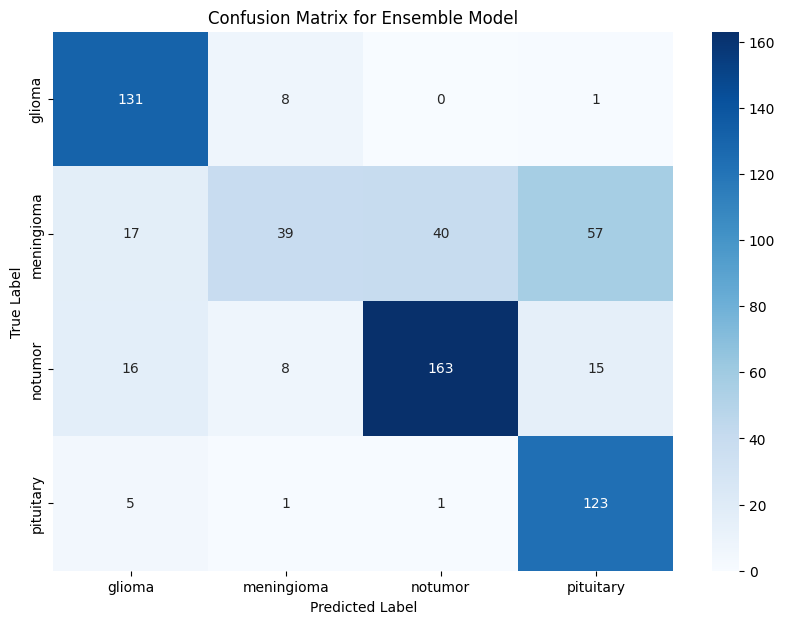

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_ensemble are defined
cm = confusion_matrix(y_test, y_pred_ensemble, labels=unique_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()
